In [5]:
import pandas as pd 

In [6]:
df = pd.read_excel("ECommerce_Sales_Global.xlsx")

In [7]:
df.head()

,Order ID,Customer ID,Order Date,Product Category,Region,Payment Method,Quantity,Price per Unit,Total Amount,Order Status
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,2025-08-04,Electronics,North America,Debit Card,2,119.37,238.74,Completed
1,57a6e460-1b66-43d3-a6af-cce9f1f58294,dd32b854-f3f2-43b7-82d4-f31c51c680ca,2025-08-04,Beauty & Health,Asia,Net Banking,4,381.54,1526.16,Completed
2,2146de31-3a6b-45aa-a98f-307205bab8a1,87f2b581-4809-4026-9c29-aca720612cdd,2025-08-04,Clothing,Asia,Credit Card,2,86.22,172.44,Completed
3,b8b75626-b805-4666-b16f-f4f50fbfae31,6d1b5e96-6e64-4ec8-95db-0b31f6c84ff5,2025-08-04,Clothing,South America,Net Banking,2,396.42,792.84,Completed
4,7eaef452-8eba-4e78-bb16-27737ab417d6,995c712f-2a96-48bd-8f70-6894472678ac,2025-08-04,Beauty & Health,Europe,Debit Card,1,199.30,199.30,Completed


In [11]:
df.isnull().sum()

Order ID            0
Customer ID         0
Order Date          0
Product Category    0
Region              0
Payment Method      0
Quantity            0
Price per Unit      0
Total Amount        0
Order Status        0
dtype: int64

In [13]:
df.dtypes

Order ID                    object
Customer ID                 object
Order Date          datetime64[ns]
Product Category            object
Region                      object
Payment Method              object
Quantity                     int64
Price per Unit             float64
Total Amount               float64
Order Status                object
dtype: object

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [22]:
df['YearMonth'] = df['Order Date'].dt.to_period('M')
df['Weekday'] = df['Order Date'].dt.day_name()

In [26]:
df.dtypes

Order ID                    object
Customer ID                 object
Order Date          datetime64[ns]
Product Category            object
Region                      object
Payment Method              object
Quantity                     int64
Price per Unit             float64
Total Amount               float64
Order Status                object
YearMonth                period[M]
Weekday                     object
dtype: object

In [30]:
total_sales = df["Total Amount"].sum()

In [32]:
total_sales

3757164.0999999996

In [36]:
total_orders = df["Order ID"].nunique()

In [38]:
total_orders

5000

In [42]:
unique_customers = df["Customer ID"].nunique()

In [44]:
unique_customers

5000

In [46]:
sales_by_region = df.groupby("Region")["Total Amount"].sum().sort_values(ascending=False)

In [48]:
sales_by_region

Region
South America    792970.88
Australia        755904.07
North America    739304.74
Europe           735895.03
Asia             733089.38
Name: Total Amount, dtype: float64

In [54]:
top_category = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

In [56]:
top_category

Product Category
Books              781545.18
Electronics        761752.04
Clothing           746894.93
Home & Kitchen     741290.72
Beauty & Health    725681.23
Name: Total Amount, dtype: float64

In [58]:
df.groupby('YearMonth')['Total Amount'].sum()

YearMonth
2025-08    3757164.1
Freq: M, Name: Total Amount, dtype: float64

In [60]:
df.groupby(['YearMonth', 'Order Status']).size().unstack()

Order Status,Cancelled,Completed,Returned
YearMonth,,,
2025-08,468,4291,241


In [62]:
df.groupby('Product Category')['Total Amount'].sum()

Product Category
Beauty & Health    725681.23
Books              781545.18
Clothing           746894.93
Electronics        761752.04
Home & Kitchen     741290.72
Name: Total Amount, dtype: float64

In [64]:
df['Payment Method'].value_counts()

Payment Method
Credit Card    1290
Net Banking    1267
PayPal         1225
Debit Card     1218
Name: count, dtype: int64

<Axes: xlabel='Quantity', ylabel='Total Amount'>

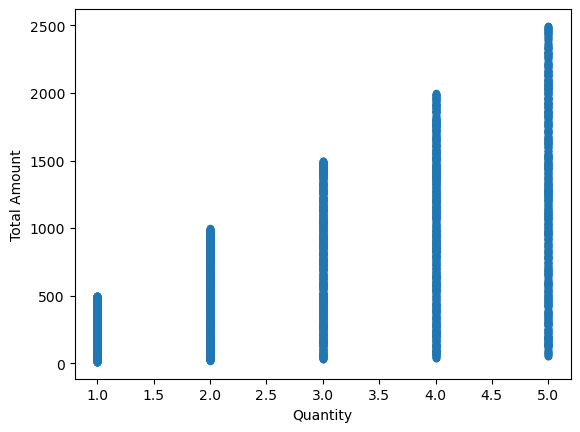

In [67]:
df.plot.scatter(x='Quantity', y='Total Amount')

In [105]:
df.to_csv("Cleaned_Ecommerce_Global.csv", index=False)

In [107]:
df.to_excel("Ecommerce_Tableau_Ready.xlsx", index=False)

In [73]:
df

,Order ID,Customer ID,Order Date,Product Category,Region,Payment Method,Quantity,Price per Unit,Total Amount,Order Status,YearMonth,Weekday
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,2025-08-04,Electronics,North America,Debit Card,2,119.37,238.74,Completed,2025-08,Monday
1,57a6e460-1b66-43d3-a6af-cce9f1f58294,dd32b854-f3f2-43b7-82d4-f31c51c680ca,2025-08-04,Beauty & Health,Asia,Net Banking,4,381.54,1526.16,Completed,2025-08,Monday
2,2146de31-3a6b-45aa-a98f-307205bab8a1,87f2b581-4809-4026-9c29-aca720612cdd,2025-08-04,Clothing,Asia,Credit Card,2,86.22,172.44,Completed,2025-08,Monday
3,b8b75626-b805-4666-b16f-f4f50fbfae31,6d1b5e96-6e64-4ec8-95db-0b31f6c84ff5,2025-08-04,Clothing,South America,Net Banking,2,396.42,792.84,Completed,2025-08,Monday
4,7eaef452-8eba-4e78-bb16-27737ab417d6,995c712f-2a96-48bd-8f70-6894472678ac,2025-08-04,Beauty & Health,Europe,Debit Card,1,199.30,199.30,Completed,2025-08,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,7880adc6-2af2-4718-a0b2-17f965f35984,9c014262-815a-4a5d-ac35-e33c70fe05a1,2025-08-04,Electronics,Europe,Net Banking,3,493.21,1479.63,Returned,2025-08,Monday
4996,4598ab17-338f-4430-a2b6-eddcf7bce0ef,147bed20-7b2e-40e6-8802-8d0edcc7eb51,2025-08-04,Home & Kitchen,Europe,Credit Card,3,292.49,877.47,Completed,2025-08,Monday
4997,6a7330b3-ecfa-4700-a790-eee07dcfe924,be006ccb-f872-4487-a507-c321f0b6844f,2025-08-04,Clothing,South America,Net Banking,1,119.30,119.30,Cancelled,2025-08,Monday
4998,66c9e45f-eca0-41c6-b5bb-5dd72955c593,2f1f9181-28ae-4c66-9795-795d2c017a94,2025-08-04,Clothing,Asia,Credit Card,1,118.02,118.02,Completed,2025-08,Monday


In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [81]:
df = pd.read_excel("ECommerce_Sales_Global.xlsx")

In [93]:
df['Order_Status_Binary'] = df['Order Status'].apply(lambda x: 1 if x == 'Completed' else 0)


In [95]:
features = df[['Quantity', 'Price per Unit', 'Total Amount']]  # Add more if needed
target = df['Order_Status_Binary']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [101]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [103]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("📄 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.747
📊 Confusion Matrix:
 [[ 24 110]
 [143 723]]
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.18      0.16       134
           1       0.87      0.83      0.85       866

    accuracy                           0.75      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.77      0.75      0.76      1000

